<a href="https://colab.research.google.com/github/Alf-caput/LAB03_Clasificacion/blob/Ldev/Practica1LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PRÁCTICA 1 LAB 03: Técnicas y Modelos de Clasificación

A partir de datos sobre características de tumores, se desea llevar a cabo un Decision Support System para comprender las características que más influyen en el diagnóstico de cáncer de mama.

Un Decision Support System es un sistema computacional basado en minería de datos que brinda información para tomar una decisión.  

Primero se carga el dataset 'cancer.csv':

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 1) Preprocesamiento de los datos.

Analizar datos NaN:

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Hay una columna, 'Unnamed', que contiene 32 datos nulos.  No hay información sobre ellos, y son pocos.  Se elimina dicha columna.



In [70]:
df = df.drop(columns = ['Unnamed: 32'])


ValueError: could not convert string to float: 'M'

Eliminar datos que sean muy dependientes de otros.

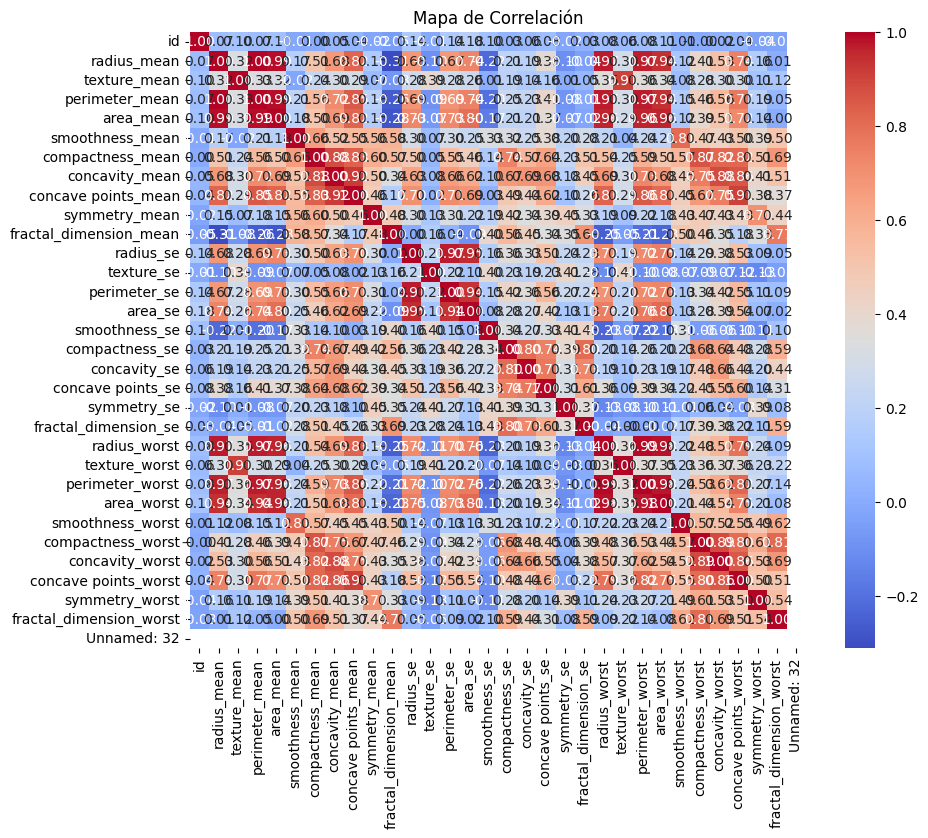

In [68]:
df_new = df.drop(columns=['diagnosis'])
correlation_matrix = df_new.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlación')
plt.show()

correlation = df['radius_mean'].corr(df['texture_se'])


A continuación se imprimirán los coeficientes de correlación de las variables que sean muy dependientes (mayores a 0.8).   Primero en forma matricial.

In [73]:
correlation_matrix = df_new.corr()

#
high_correlation = correlation_matrix[(correlation_matrix >= 0.8) & (correlation_matrix < 1.0)]

# Imprimir las variables con coeficientes de correlación mayores o iguales a 0.8
print("Variables con coeficiente de correlación mayor o igual a 0.8:")
print(high_correlation.dropna(axis=1, how='all').dropna(axis=0, how='all').to_string(na_rep=''))


Variables con coeficiente de correlación mayor o igual a 0.8:
                         radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  radius_se  perimeter_se   area_se  compactness_se  concavity_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  fractal_dimension_worst
radius_mean                                               0.997855   0.987357                                                                0.822529                                                                                             0.969539                        0.965137    0.941082                                                                                                     
texture_mean                                                                                                                                      

Ahora se muestran los pares de variables muy dependientes.

In [77]:

# Calcular los coeficientes de correlación
correlation_matrix = df_new.corr()

# Iterar sobre las combinaciones de variables
print('Las variables más dependientes entre sí son:\n')
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.8:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} y {var2}")


Las variables más dependientes entre sí son:

radius_mean y perimeter_mean
radius_mean y area_mean
radius_mean y concave points_mean
radius_mean y radius_worst
radius_mean y perimeter_worst
radius_mean y area_worst
texture_mean y texture_worst
perimeter_mean y area_mean
perimeter_mean y concave points_mean
perimeter_mean y radius_worst
perimeter_mean y perimeter_worst
perimeter_mean y area_worst
area_mean y concave points_mean
area_mean y area_se
area_mean y radius_worst
area_mean y perimeter_worst
area_mean y area_worst
smoothness_mean y smoothness_worst
compactness_mean y concavity_mean
compactness_mean y concave points_mean
compactness_mean y compactness_worst
compactness_mean y concavity_worst
compactness_mean y concave points_worst
concavity_mean y concave points_mean
concavity_mean y concavity_worst
concavity_mean y concave points_worst
concave points_mean y radius_worst
concave points_mean y perimeter_worst
concave points_mean y area_worst
concave points_mean y concave points_wo

Hay un gran número de pares de variables dependientes.  Interesa eliminar dicha dependencia, pues se quiere el mejor resultado posible con el menor número de variables.
area diametro compacidad